In this notebook, we will use Skyrim to get NOAA's [Global Forecast System](https://www.ncei.noaa.gov/products/weather-climate-models/global-forecast) (GFS) predictions—a global weather model.

🛑 This notebook does not require any GPU.

🪁 Again, we will focus on the wind-speed predictions for the Akyaka region in Turkey, which is a celestial spot for kitesurfing.

Our approach:
1. Initialize the GFSModel with the variables of interest, i.e., `u10m`, `v10m`, `t2m`.
2. Get global predictions.
3. Plot the acquired forecast.
4. Utilize `GFSModel.snipe()` method, which retrieves the forecast for a specific target datetime, considering multiple possible start times. With this approach you can see how newly assimilated date changes the forecast. (can also be utilized as a proxy for uncertainty)

☢️️ NOTE:
Acquired forecasts should be taken with a grain of salt—our observations at Akyaka suggest that global weather models fail to capture the local wind characteristics of the kitesurfing beach. :)


In [1]:
from skyrim.libs.nwp import GFSModel

In [2]:
# comment out the following line to see the logs
from loguru import logger
import sys
logger.remove()
logger.add(sys.stdout, level="INFO")

1

In [3]:
# to see the available channels use the following command
GFSModel.list_available_channels()[0:10]

['u10m', 'v10m', 'u100m', 'v100m', 't2m', 'sp', 'msl', 'tcwv', 'u50', 'u100']

In [4]:
# specify the channels you are interested in
channels = [
    "u10m", # u-component (eastward, zonal) of wind at 10 meters
    "v10m", # v-component (northward, meridional) of wind at 10 meters
    "t2m",  # temperature at 2m
]

In [5]:
# initialize the model
model = GFSModel(channels=channels)

# to see where the results are cached
# print(model.cache)

# to clear the cache
# model.clear_cache()

2024-06-26 13:56:47.231 | INFO     | skyrim.libs.nwp.gfs:__init__:178 - GFS model initialized with channels: ['u10m', 'v10m', 't2m']


In [6]:
# get a daily global forecast from the GFS model
pred = model.predict(date="20240613", time="0000", lead_time=24)

Fetching GFS for 2024-06-13 00:00:00:   0%|          | 0/3 [00:00<?, ?it/s]

Fetching GFS for 2024-06-13 00:00:00: 100%|██████████| 3/3 [00:12<00:00,  4.29s/it]


In [7]:
# interested in winds speed at akayaka, Turkey (great place for kite surfing!)
akyaka_coords = {"lat": 37.0557, "lon": 28.3242}
pred_akyaka = pred.sel(lat=akyaka_coords["lat"], lon=akyaka_coords["lon"], method="nearest")
pred_wind_speed = (pred_akyaka.sel(channel="u10m")**2 + pred_akyaka.sel(channel="v10m")**2)**0.5
pred_wind_speed     

<xarray.DataArray (time: 25)> Size: 200B
array([2.15662469, 2.49584435, 3.17731254, 3.34144008, 3.19191033,
       2.25343966, 1.46619776, 2.02568793, 3.35475672, 3.68483365,
       3.63495247, 4.39460557, 4.07563796, 4.05452944, 5.11811967,
       6.54845753, 4.29171464, 2.60072334, 3.0517703 , 3.12565164,
       3.07490176, 2.86719336, 2.89179188, 3.15635124, 3.34555511])
Coordinates:
  * time     (time) datetime64[ns] 200B 2024-06-13 ... 2024-06-14
    lat      float64 8B 37.0
    lon      float64 8B 28.25

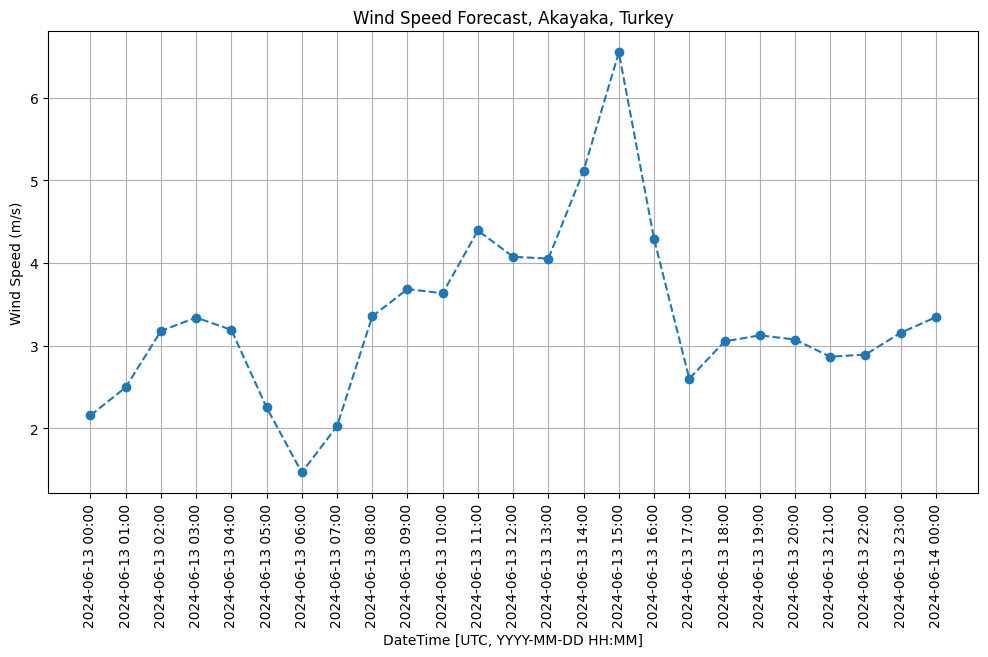

In [8]:
# plot wind speeds with forecast date times
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(pred.time.values).strftime("%Y-%m-%d %H:%M"), pred_wind_speed.values, "--o")
plt.title("Wind Speed Forecast, Akayaka, Turkey")
plt.xlabel("DateTime [UTC, YYYY-MM-DD HH:MM]")
plt.ylabel("Wind Speed (m/s)")
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [9]:
# if interested in specific date and time
preds_dict = model.snipe(target_date = "20240613", 
                         target_time= "1200", 
                         max_hours_back=24*2 # 2 days
                         )

2024-06-26 13:57:09.853 | INFO     | skyrim.libs.nwp.gfs:snipe:342 - Fetching for start_time: 2024-06-13 12:00:00


Fetching GFS for 2024-06-13 12:00:00: 100%|██████████| 3/3 [00:00<00:00,  5.93it/s]

2024-06-26 13:57:11.346 | INFO     | skyrim.libs.nwp.gfs:snipe:342 - Fetching for start_time: 2024-06-13 06:00:00



Fetching GFS for 2024-06-13 06:00:00: 100%|██████████| 3/3 [00:00<00:00,  6.00it/s]

2024-06-26 13:57:11.848 | INFO     | skyrim.libs.nwp.gfs:snipe:342 - Fetching for start_time: 2024-06-13 00:00:00



Fetching GFS for 2024-06-13 00:00:00: 100%|██████████| 3/3 [00:00<00:00,  6.14it/s]

2024-06-26 13:57:12.340 | INFO     | skyrim.libs.nwp.gfs:snipe:342 - Fetching for start_time: 2024-06-12 18:00:00



Fetching GFS for 2024-06-12 18:00:00: 100%|██████████| 3/3 [00:00<00:00,  5.93it/s]

2024-06-26 13:57:13.196 | INFO     | skyrim.libs.nwp.gfs:snipe:342 - Fetching for start_time: 2024-06-12 12:00:00



Fetching GFS for 2024-06-12 12:00:00: 100%|██████████| 3/3 [00:00<00:00,  5.72it/s]

2024-06-26 13:57:13.723 | INFO     | skyrim.libs.nwp.gfs:snipe:342 - Fetching for start_time: 2024-06-12 06:00:00



Fetching GFS for 2024-06-12 06:00:00: 100%|██████████| 3/3 [00:00<00:00,  6.11it/s]

2024-06-26 13:57:14.216 | INFO     | skyrim.libs.nwp.gfs:snipe:342 - Fetching for start_time: 2024-06-12 00:00:00



Fetching GFS for 2024-06-12 00:00:00: 100%|██████████| 3/3 [00:00<00:00,  5.90it/s]

2024-06-26 13:57:14.728 | INFO     | skyrim.libs.nwp.gfs:snipe:342 - Fetching for start_time: 2024-06-11 18:00:00



Fetching GFS for 2024-06-11 18:00:00: 100%|██████████| 3/3 [00:00<00:00,  5.90it/s]

2024-06-26 13:57:15.601 | INFO     | skyrim.libs.nwp.gfs:snipe:342 - Fetching for start_time: 2024-06-11 12:00:00



Fetching GFS for 2024-06-11 12:00:00: 100%|██████████| 3/3 [00:00<00:00,  5.88it/s]


In [10]:
# get the forecast for the specific date and time
# see how the predictions change over time as new data assimilated
for time, pred in preds_dict.items():
    pred_akyaka = pred.sel(lat=akyaka_coords["lat"], lon=akyaka_coords["lon"], method="nearest")
    pred_wind_speed = (pred_akyaka.sel(channel="u10m")**2 + pred_akyaka.sel(channel="v10m")**2)**0.5
    print(f"Forecast Start DateTime: {pd.to_datetime(time)}, Estimated Wind Speed: {pred_wind_speed.values}")

Forecast Start DateTime: 2024-06-13 12:00:00, Estimated Wind Speed: [4.23997016]
Forecast Start DateTime: 2024-06-13 06:00:00, Estimated Wind Speed: [4.28940128]
Forecast Start DateTime: 2024-06-13 00:00:00, Estimated Wind Speed: [4.07563796]
Forecast Start DateTime: 2024-06-12 18:00:00, Estimated Wind Speed: [4.10685801]
Forecast Start DateTime: 2024-06-12 12:00:00, Estimated Wind Speed: [3.24703005]
Forecast Start DateTime: 2024-06-12 06:00:00, Estimated Wind Speed: [3.45216904]
Forecast Start DateTime: 2024-06-12 00:00:00, Estimated Wind Speed: [4.74497719]
Forecast Start DateTime: 2024-06-11 18:00:00, Estimated Wind Speed: [4.19054864]
Forecast Start DateTime: 2024-06-11 12:00:00, Estimated Wind Speed: [4.26237742]
